<a href="https://colab.research.google.com/github/hiiamjay/Big-Data/blob/main/J075_Dask_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Name: Jay Prajapati 
##Roll No.: J075

In [ ]:
#!conda install dask
#!conda install -c conda-forge python-graphviz/ pip install graphviz

In [2]:
!conda install dask                     # either conda install
!python -m pip install dask[dataframe] --upgrade  # or python -m pip install

/bin/bash: conda: command not found
     |████████████████████████████████| 942kB 5.6MB/s 
     |████████████████████████████████| 112kB 14.2MB/s 
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [3]:
!pip install dask[complete]

     |████████████████████████████████| 686kB 6.0MB/s 
ERROR: distributed 2021.4.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [4]:
# importing the multiprocessing module 
import multiprocessing 
import os
def print_cube(num): 
    """ 
    function to print cube of given num 
    """
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

def print_square(num): 
    """ 
    function to print square of given num 
    """
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # starting process 1 
    p1.start() 
    # starting process 2 
    p2.start() 

    # wait until process 1 is finished 
    p1.join() 
    # wait until process 2 is finished 
    p2.join() 

    # both processes finished 
    print("Done!") 


124
Square: 100
127
Cube: 1000
Done!


In [5]:
from time import sleep

def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [6]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 14.1 ms, sys: 1.06 ms, total: 15.2 ms
Wall time: 3 s


In [7]:
import dask
from dask import delayed

x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.visualize()


z.compute()

2450.0


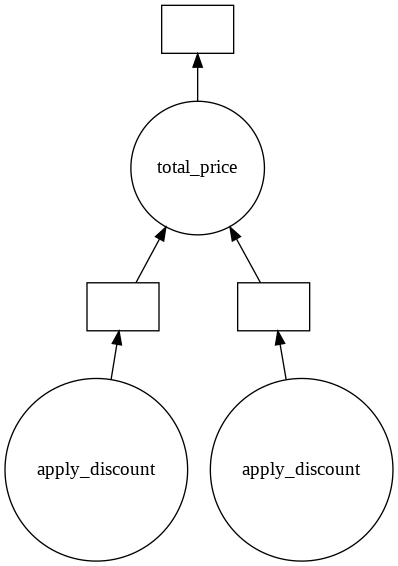

In [8]:
z.visualize()

In [9]:
# Functions to perform mathematics operations
def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

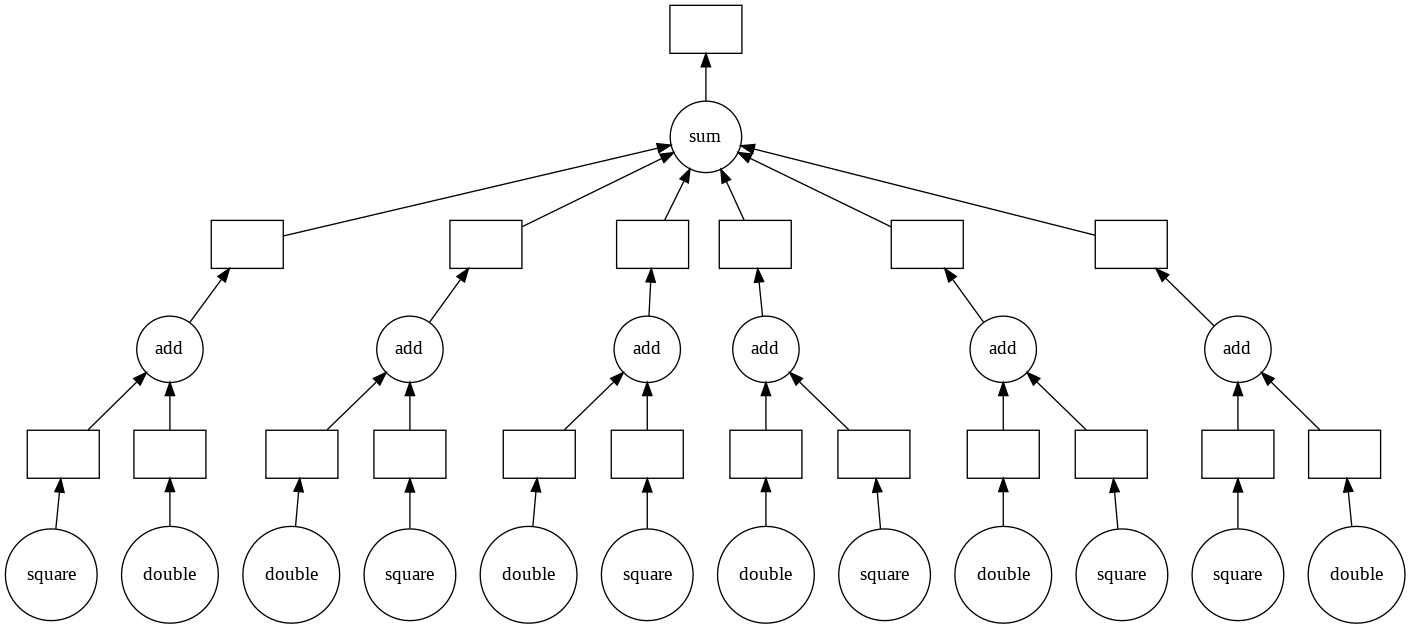

In [10]:
total = delayed(sum)(output)
total.visualize()

In [11]:
import concurrent

In [12]:
import multiprocessing
multiprocessing.cpu_count()

2

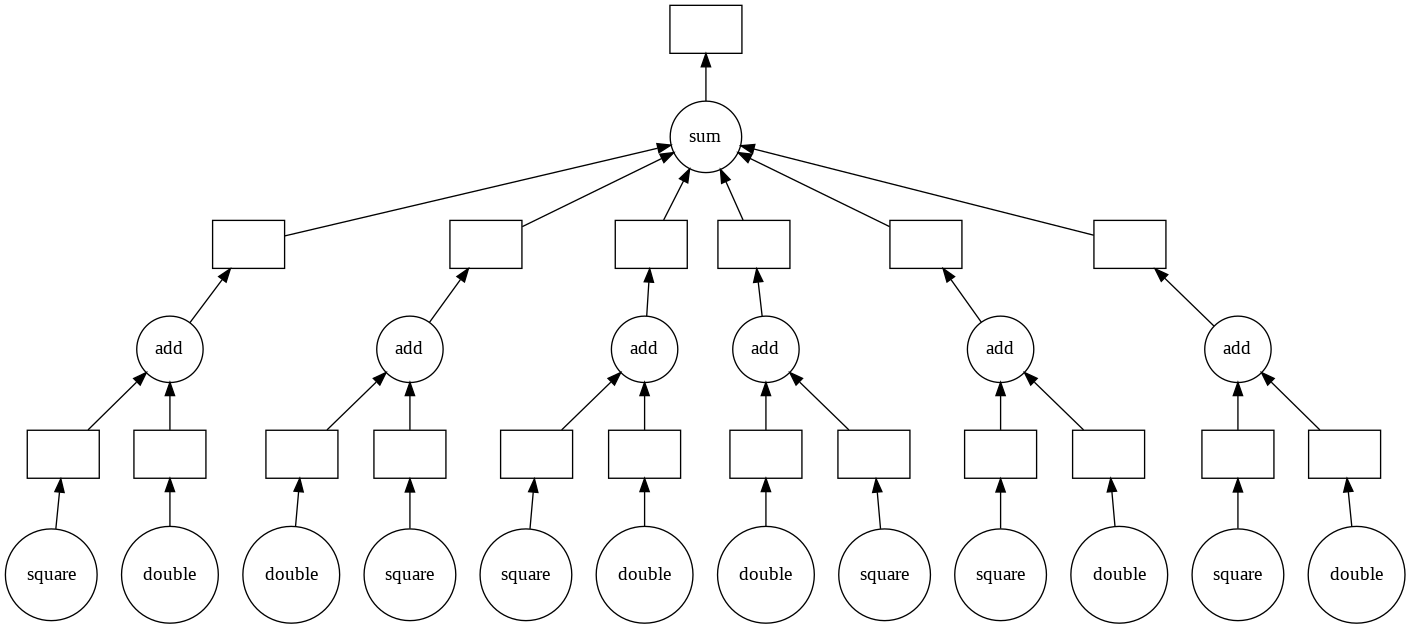

In [13]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

In [14]:
import dask.dataframe as dd

In [15]:
dask.__version__

'2021.04.0'

In [16]:
df = dask.datasets.timeseries()

In [17]:
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [18]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,985,George,0.071746,0.332244
2000-01-01 00:00:01,1025,Alice,0.212261,0.316685
2000-01-01 00:00:02,1011,Alice,-0.212132,0.521349
2000-01-01 00:00:03,989,Yvonne,-0.519993,0.498053
2000-01-01 00:00:04,1003,Ingrid,-0.789228,0.572710


In [19]:
df1 = df.groupby('name').y.std()

In [20]:
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [21]:
df1.compute()

name
Alice       0.576544
Bob         0.578147
Charlie     0.577266
Dan         0.575848
Edith       0.577351
Frank       0.576462
George      0.577127
Hannah      0.576470
Ingrid      0.577082
Jerry       0.577076
Kevin       0.576298
Laura       0.578285
Michael     0.579286
Norbert     0.576633
Oliver      0.577119
Patricia    0.576368
Quinn       0.577193
Ray         0.578320
Sarah       0.577549
Tim         0.577615
Ursula      0.577583
Victor      0.577578
Wendy       0.574950
Xavier      0.576445
Yvonne      0.577349
Zelda       0.575713
Name: y, dtype: float64

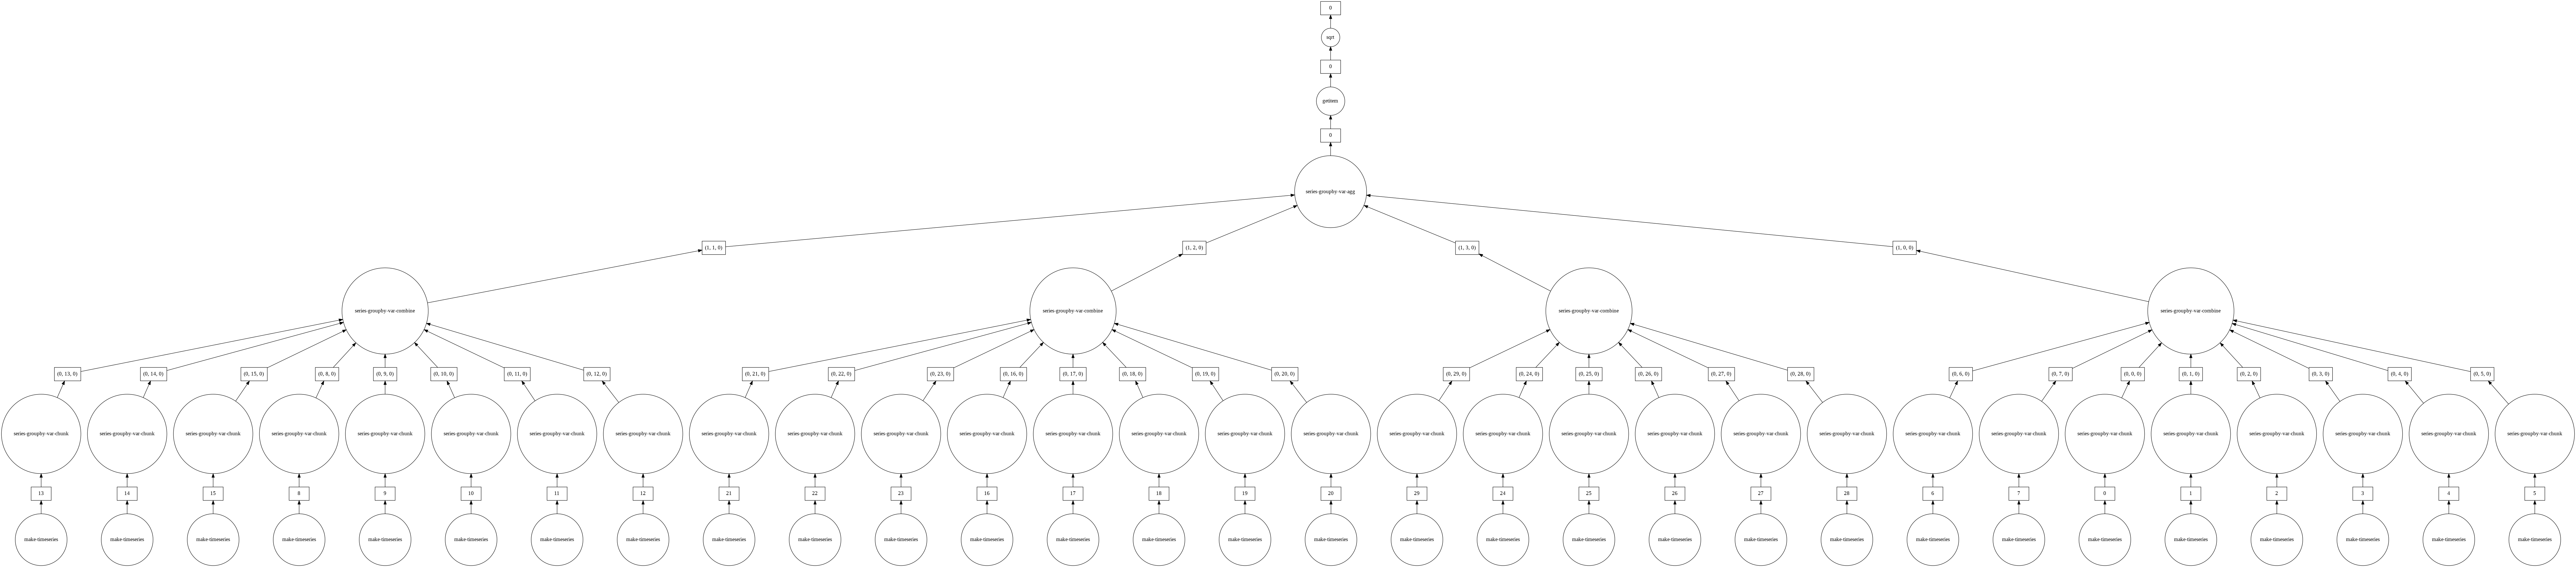

In [22]:
df1.visualize()

In [23]:
%time
df.loc['2000-01-01']

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [24]:
df = df.persist()

In [25]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,985,George,0.071746,0.332244
2000-01-01 00:00:01,1025,Alice,0.212261,0.316685
2000-01-01 00:00:02,1011,Alice,-0.212132,0.521349
2000-01-01 00:00:03,989,Yvonne,-0.519993,0.498053
2000-01-01 00:00:04,1003,Ingrid,-0.789228,0.572710
...,...,...,...,...
2000-01-01 23:59:55,1002,Wendy,-0.376113,-0.495535
2000-01-01 23:59:56,994,Edith,0.416151,-0.881230
2000-01-01 23:59:57,976,Kevin,-0.331039,-0.561154


In [26]:
import dask.bag as db


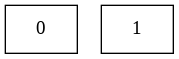

In [27]:
dask_bag = db.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

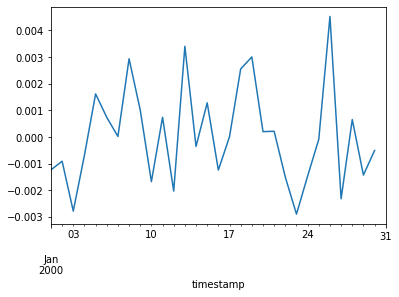

In [28]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [29]:
len(df)

2592000

In [30]:
# from dask.distributed import Client
import pandas as pd
import time
import numpy as np

In [42]:
# client = Client(processes = False)

In [43]:
# client

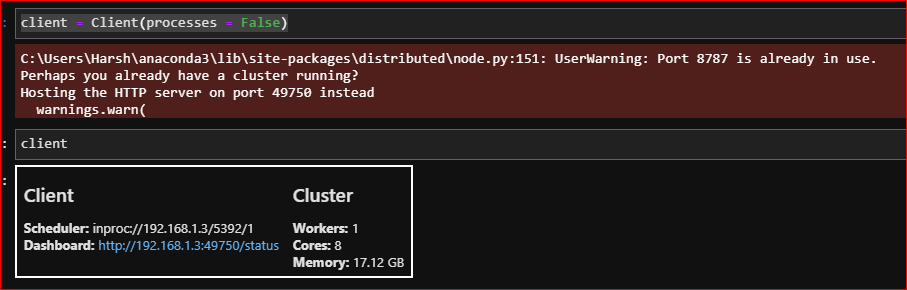

Proof of running it on our systems.
Dask Client does not run on colab

In [33]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.996294,0.084036,0.898322,0.951166
1,0.986389,0.656382,0.938689,0.257148
2,0.686970,0.326471,0.937088,0.155539
3,0.417539,0.688033,0.819561,0.015066
4,0.741223,0.424472,0.307292,0.991272


In [34]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [35]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 6.92 s, sys: 27.5 ms, total: 6.94 s
Wall time: 18.9 s


In [36]:
results

[4999574.706057951, 4999996.324845668, 5001988.641015686, 5000709.974683258]

In [37]:
import dask

In [38]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 1.49 ms, sys: 1.04 ms, total: 2.53 ms
Wall time: 2.39 ms


In [39]:
results[0]

Delayed('costly_simulation-a7884e04-209d-47d2-9c01-d2a77d089282')

In [40]:
%time dask.compute(*results)

CPU times: user 7.01 s, sys: 31.2 ms, total: 7.04 s
Wall time: 13 s


(4999574.706057951, 4999996.324845668, 5001988.641015686, 5000709.974683258)